In [1]:
# R-script - Mendelian Randomization practicum 
 
# Applied research question: Does having higher proinflammatory CRP causally increase your blood pressure? 
# 1. Observational analyses (simple linear regressions in R)
# 2. MR/IV Analyses: Wald Estimator (simple linear regression)
# 3. MR/IV Analyses: TSLS (ivreg R-package)
# 4. Manual TSLS (simple linear regression)
# 5. Weak instrument bias

In [2]:
R.version.string

[1] "R version 4.2.1 (2022-06-23)"

In [3]:
rm(list = ls())   # remove all variables in the environment

In [4]:
sex <- "female"
data_file <- paste("output/ukb_pheno_geno/ukb_pheno_geno_", sex, ".tab", sep="")

In [6]:
length(WHR)

[1] 165833

In [7]:
dim(example)

[1] 165833     66

In [9]:
summary(lm(PGS000842_SCORE~WHR))


Call:
lm(formula = PGS000842_SCORE ~ WHR)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.102384 -0.018224 -0.000496  0.017763  0.121084 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0223514  0.0007662  -29.17   <2e-16 ***
WHR          0.0274050  0.0009360   29.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02657 on 165831 degrees of freedom
Multiple R-squared:  0.005143,	Adjusted R-squared:  0.005137 
F-statistic: 857.2 on 1 and 165831 DF,  p-value: < 2.2e-16


In [10]:
summary(lm(PGS000842_SCORE~CAD))


Call:
lm(formula = PGS000842_SCORE ~ CAD)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.102549 -0.018278 -0.000491  0.017752  0.122201 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.0008275  0.0004906  -1.687   0.0917 .
CAD          0.0008119  0.0004771   1.702   0.0888 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02664 on 165831 degrees of freedom
Multiple R-squared:  1.746e-05,	Adjusted R-squared:  1.143e-05 
F-statistic: 2.896 on 1 and 165831 DF,  p-value: 0.08881


In [11]:
summary(lm(PGS000842_SCORE~AGE))


Call:
lm(formula = PGS000842_SCORE ~ AGE)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.102496 -0.018295 -0.000488  0.017745  0.122175 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  4.078e-04  4.715e-04   0.865    0.387
AGE         -7.225e-06  8.273e-06  -0.873    0.382

Residual standard error: 0.02664 on 165831 degrees of freedom
Multiple R-squared:  4.599e-06,	Adjusted R-squared:  -1.431e-06 
F-statistic: 0.7627 on 1 and 165831 DF,  p-value: 0.3825


In [12]:
summary(lm(PGS000842_SCORE~EVER_SMOKED))


Call:
lm(formula = PGS000842_SCORE ~ EVER_SMOKED)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.102479 -0.018292 -0.000489  0.017750  0.122074 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.116e-04  9.927e-05   1.125    0.261
EVER_SMOKED -1.973e-04  1.320e-04  -1.495    0.135

Residual standard error: 0.02664 on 165831 degrees of freedom
Multiple R-squared:  1.348e-05,	Adjusted R-squared:  7.453e-06 
F-statistic: 2.236 on 1 and 165831 DF,  p-value: 0.1348


In [13]:
summary(lm(PGS000842_SCORE~TOWNSEND))


Call:
lm(formula = PGS000842_SCORE ~ TOWNSEND)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.102575 -0.018286 -0.000489  0.017756  0.122208 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -1.060e-05  7.358e-05  -0.144    0.885
TOWNSEND    -6.994e-06  2.227e-05  -0.314    0.753

Residual standard error: 0.02664 on 165831 degrees of freedom
Multiple R-squared:  5.95e-07,	Adjusted R-squared:  -5.435e-06 
F-statistic: 0.09867 on 1 and 165831 DF,  p-value: 0.7534


In [14]:
summary(lm(CAD~WHR+AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10))


Call:
lm(formula = CAD ~ WHR + AGE + PC1 + PC2 + PC3 + PC4 + PC5 + 
    PC6 + PC7 + PC8 + PC9 + PC10)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.11312 -0.02983 -0.01932 -0.00704  1.01810 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.430e-01  4.510e-03 186.908  < 2e-16 ***
WHR          1.198e-01  4.880e-03  24.558  < 2e-16 ***
AGE          1.425e-03  4.312e-05  33.055  < 2e-16 ***
PC1          1.553e-04  1.323e-04   1.174 0.240259    
PC2          4.648e-05  1.579e-04   0.294 0.768414    
PC3          2.968e-04  1.867e-04   1.590 0.111838    
PC4          2.805e-04  8.366e-05   3.353 0.000799 ***
PC5          1.707e-04  4.791e-05   3.562 0.000368 ***
PC6          2.270e-05  1.706e-04   0.133 0.894151    
PC7         -7.748e-05  7.891e-05  -0.982 0.326111    
PC8          7.414e-05  1.119e-04   0.662 0.507736    
PC9          3.234e-04  7.397e-05   4.372 1.23e-05 ***
PC10         1.969e-05  1.455e-04   0.135 0.892404    
---
Sign

In [15]:
summary(lm(PGS000842_SCORE~DBP))


Call:
lm(formula = PGS000842_SCORE ~ DBP)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.102543 -0.018286 -0.000493  0.017754  0.122211 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.892e-04  2.296e-04   1.259    0.208
DBP         -3.842e-06  2.925e-06  -1.314    0.189

Residual standard error: 0.02664 on 165831 degrees of freedom
Multiple R-squared:  1.041e-05,	Adjusted R-squared:  4.38e-06 
F-statistic: 1.726 on 1 and 165831 DF,  p-value: 0.1889


In [16]:
summary(lm(PGS000842_SCORE~SBP))


Call:
lm(formula = PGS000842_SCORE ~ SBP)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.102447 -0.018293 -0.000496  0.017758  0.122193 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  3.299e-04  2.239e-04   1.474    0.141
SBP         -2.575e-06  1.671e-06  -1.541    0.123

Residual standard error: 0.02664 on 165831 degrees of freedom
Multiple R-squared:  1.432e-05,	Adjusted R-squared:  8.288e-06 
F-statistic: 2.375 on 1 and 165831 DF,  p-value: 0.1233



Call:
lm(formula = CAD ~ WHR)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.12989 -0.02559 -0.01804 -0.01117  1.00694 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.897653   0.003942  227.70   <2e-16 ***
WHR         0.148984   0.004816   30.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1367 on 165831 degrees of freedom
Multiple R-squared:  0.005738,	Adjusted R-squared:  0.005732 
F-statistic:   957 on 1 and 165831 DF,  p-value: < 2.2e-16


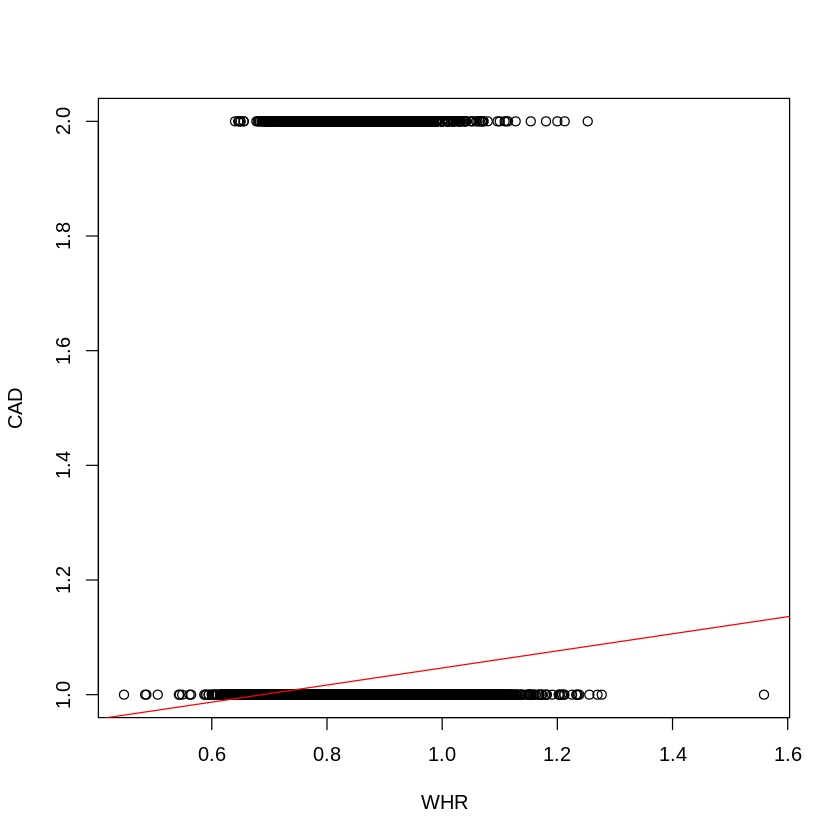

In [17]:
########################################
#####  1. Observational analyses   #####
########################################

#-----------------------------------------------------------------------------------------
#--------  Q1. What does the observational linear regression of outcome (CAD) on exposure (WHR) show?   -------
#-----------------------------------------------------------------------------------------

# Run observational OLS regression (ordinary least squares) for CAD & WHR
summary(lm(CAD~WHR)) 

# Plot the observational association between CAD and WHR
plot(WHR,CAD)
abline(lm(CAD~WHR),col="red")

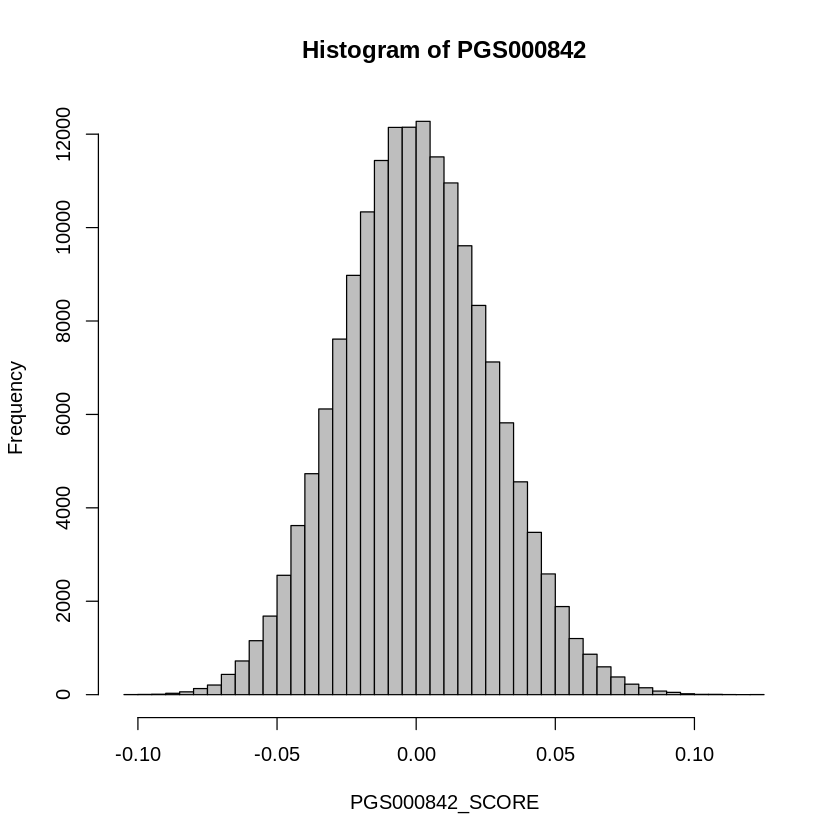

In [18]:
hist(PGS000842_SCORE, breaks=50, col = "grey", main = "Histogram of PGS000842")

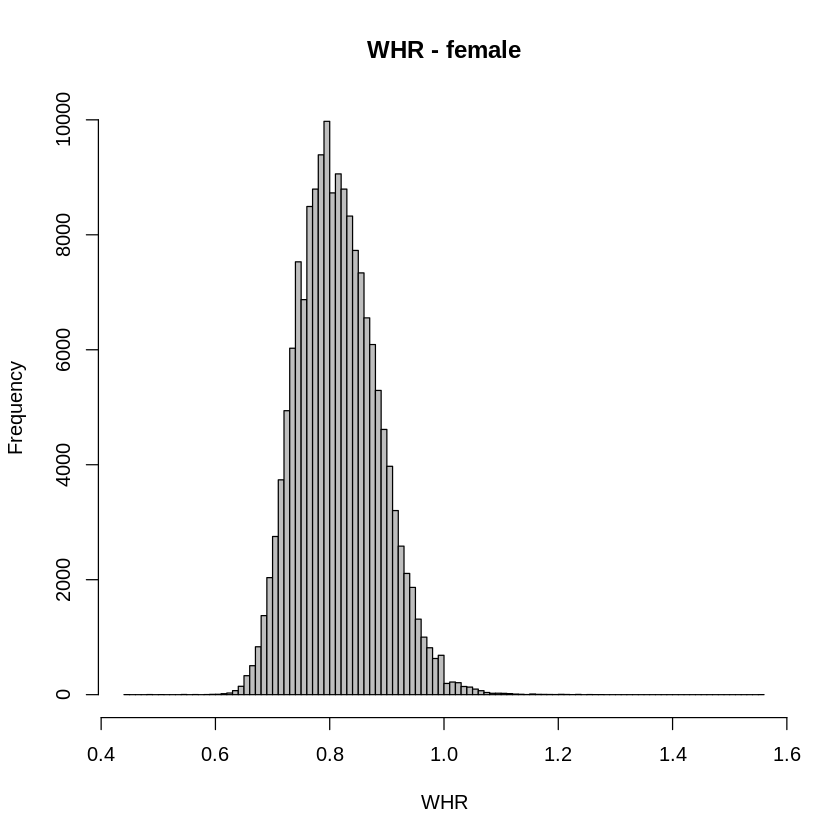

In [19]:
hist(WHR, breaks=100, col = "grey", main = "WHR - female")


Call:
lm(formula = WHR ~ PGS000842_SCORE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36341 -0.05010 -0.00491  0.04524  0.74183 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.8155936  0.0001707 4777.04   <2e-16 ***
PGS000842_SCORE 0.1876575  0.0064094   29.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06953 on 165831 degrees of freedom
Multiple R-squared:  0.005143,	Adjusted R-squared:  0.005137 
F-statistic: 857.2 on 1 and 165831 DF,  p-value: < 2.2e-16


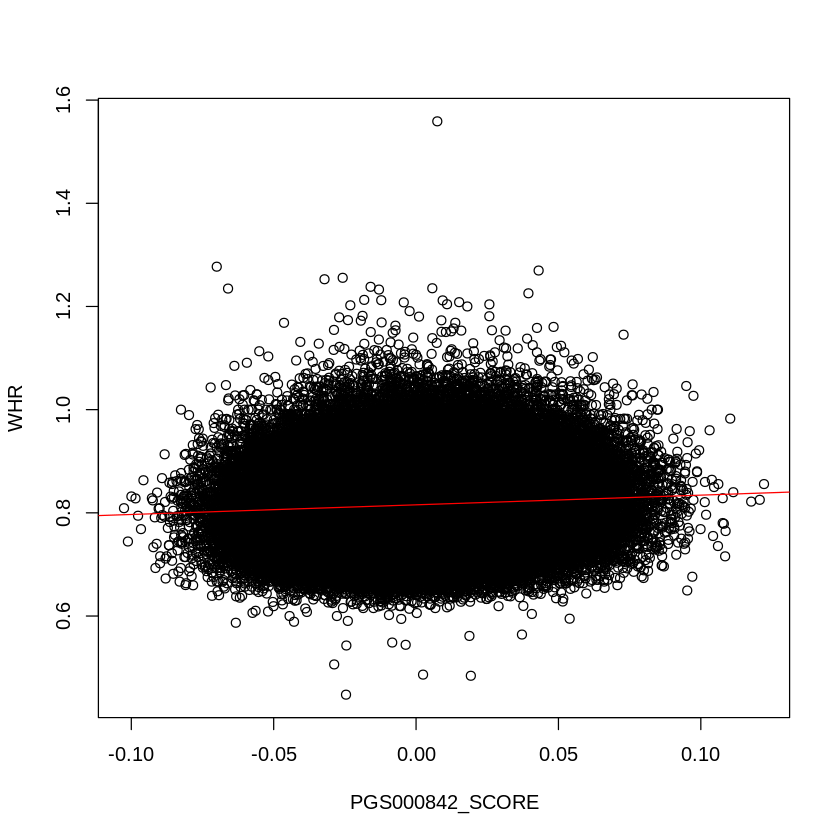

In [20]:
summary(lm(WHR~PGS000842_SCORE)) 

# Plot the observational association between CAD and WHR
plot(PGS000842_SCORE, WHR)
abline(lm(WHR~PGS000842_SCORE),col="red")


Call:
lm(formula = CAD ~ PGS000842_SCORE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02179 -0.01954 -0.01914 -0.01874  0.98269 

Coefficients:
                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     1.0191639  0.0003367 3027.199   <2e-16 ***
PGS000842_SCORE 0.0215074  0.0126387    1.702   0.0888 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1371 on 165831 degrees of freedom
Multiple R-squared:  1.746e-05,	Adjusted R-squared:  1.143e-05 
F-statistic: 2.896 on 1 and 165831 DF,  p-value: 0.08881


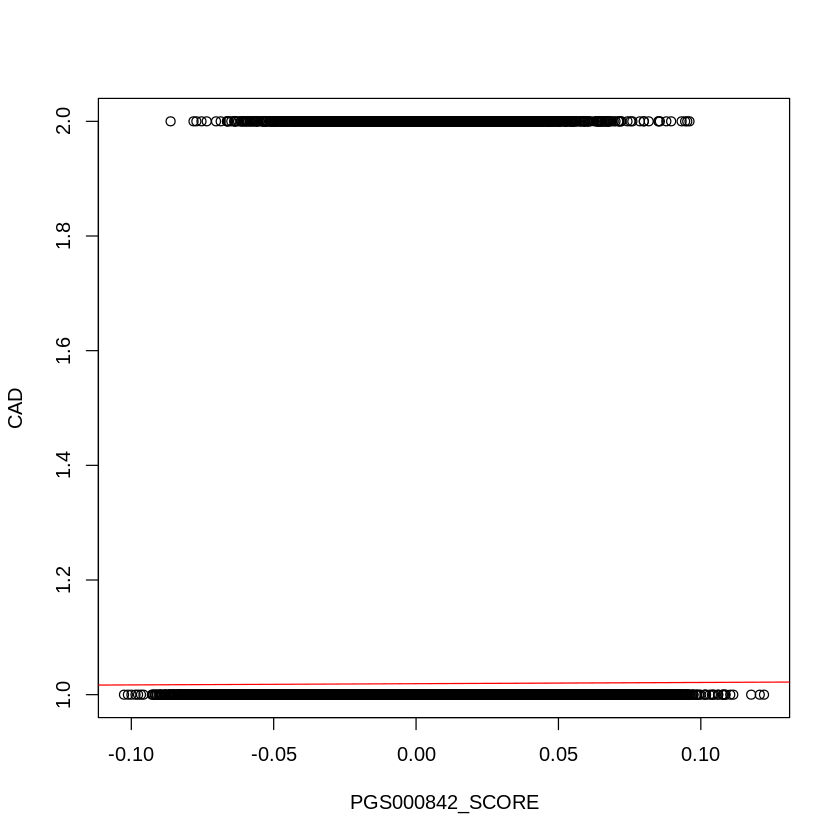

In [21]:
summary(lm(CAD~PGS000842_SCORE)) 

# Plot the observational association between CAD and WHR
plot(PGS000842_SCORE, CAD)
abline(lm(CAD~PGS000842_SCORE),col="red")

In [22]:
colnames(example)

[1] "FID"             "IID_PHENO"       "SEX_PHENO"       "AGE"            
 [5] "WAIST"           "HIP"             "PC1"             "PC2"            
 [9] "PC3"             "PC4"             "PC5"             "PC6"            
[13] "PC7"             "PC8"             "PC9"             "PC10"           
[17] "CAD"             "WHR"             "AFR"             "LFR"            
[21] "TFR"             "EID"             "EVER_SMOKED"     "BMI"            
[25] "TOWNSEND"        "IID_GENO"        "PAT"             "MAT"            
[29] "SEX_GENO"        "PHENOTYPE"       "rs2071931_T"     "rs984222_C"     
[33] "rs6427245_C"     "rs9286854_A"     "rs6541227_C"     "rs934778_G"     
[37] "rs13432332_C"    "rs2861643_T"     "rs840584_A"      "rs4684859_A"    
[41] "rs9833879_G"     "rs62271364_A"    "rs900400_C"      "rs17145265_C"   
[45] "rs2854050_A"     "rs114344942_T"   "rs2503097_G"     "rs9385414_G"    
[49] "rs6983481_T"     "Affx.32556093_T" "rs444318_A"      "rs10991417_C"   
[53] "rs72927213_C"    "rs2303436_T"     "rs797475_A"      "rs6573198_G"    
[57] "rs1129003_C"     "rs4789257_C"     "rs3810068_C"     "rs10403360_A"   
[61] "rs805770_T"      "rs1572053_A"     "rs2000339_A"     "PGS000842_SCORE"
[65] "DBP"             "SBP"

In [23]:
# Run a covariate-adjusted model for the association between WHR & CAD
summary(lm(CAD~WHR))
summary(lm(CAD~WHR+SEX_PHENO+AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10
              +rs2071931_T+rs984222_C+rs6427245_C+rs9286854_A+rs6541227_C+rs934778_G+rs13432332_C
              +rs2861643_T+rs840584_A+rs4684859_A+rs9833879_G+rs62271364_A+rs900400_C+rs17145265_C
              +rs2854050_A+rs114344942_T+rs2503097_G+rs9385414_G+rs6983481_T
              +Affx.32556093_T+rs444318_A+rs10991417_C+rs72927213_C+rs2303436_T+rs797475_A+rs6573198_G
              +rs1129003_C+rs4789257_C+rs3810068_C+rs10403360_A+rs805770_T+rs1572053_A+rs2000339_A
          ))


Call:
lm(formula = CAD ~ WHR)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.12989 -0.02559 -0.01804 -0.01117  1.00694 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.897653   0.003942  227.70   <2e-16 ***
WHR         0.148984   0.004816   30.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1367 on 165831 degrees of freedom
Multiple R-squared:  0.005738,	Adjusted R-squared:  0.005732 
F-statistic:   957 on 1 and 165831 DF,  p-value: < 2.2e-16



Call:
lm(formula = CAD ~ WHR + SEX_PHENO + AGE + PC1 + PC2 + PC3 + 
    PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + rs2071931_T + 
    rs984222_C + rs6427245_C + rs9286854_A + rs6541227_C + rs934778_G + 
    rs13432332_C + rs2861643_T + rs840584_A + rs4684859_A + rs9833879_G + 
    rs62271364_A + rs900400_C + rs17145265_C + rs2854050_A + 
    rs114344942_T + rs2503097_G + rs9385414_G + rs6983481_T + 
    Affx.32556093_T + rs444318_A + rs10991417_C + rs72927213_C + 
    rs2303436_T + rs797475_A + rs6573198_G + rs1129003_C + rs4789257_C + 
    rs3810068_C + rs10403360_A + rs805770_T + rs1572053_A + rs2000339_A)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.11286 -0.02990 -0.01927 -0.00698  1.01799 

Coefficients: (1 not defined because of singularities)
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8.454e-01  4.927e-03 171.593  < 2e-16 ***
WHR              1.195e-01  4.910e-03  24.333  < 2e-16 ***
SEX_PHENO               NA         NA      NA 

### MR/IV Analysis: TSLS

In [24]:
library(AER)

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival



In [25]:
summary(ivreg(CAD~WHR))


Call:
ivreg(formula = CAD ~ WHR)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.12989 -0.02559 -0.01804 -0.01117  1.00694 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.897653   0.003942  227.70   <2e-16 ***
WHR         0.148984   0.004816   30.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1367 on 165831 degrees of freedom
Multiple R-Squared: 0.005738,	Adjusted R-squared: 0.005732 
Wald test:   957 on 1 and 165831 DF,  p-value: < 2.2e-16 


In [26]:
summary(ivreg(CAD~WHR | AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10))


Call:
ivreg(formula = CAD ~ WHR | AGE + PC1 + PC2 + PC3 + PC4 + PC5 + 
    PC6 + PC7 + PC8 + PC9 + PC10)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77416 -0.06295 -0.01153  0.03537  1.15885 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.19066    0.02381   8.007 1.19e-15 ***
WHR          1.01583    0.02919  34.797  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1495 on 165831 degrees of freedom
Multiple R-Squared: -0.1885,	Adjusted R-squared: -0.1885 
Wald test:  1211 on 1 and 165831 DF,  p-value: < 2.2e-16 


In [27]:
summary(ivreg(CAD~WHR |   
    +rs2071931_T+rs984222_C+rs6427245_C+rs9286854_A+rs6541227_C+rs934778_G+rs13432332_C
    +rs2861643_T+rs840584_A+rs4684859_A+rs9833879_G+rs62271364_A+rs900400_C+rs17145265_C
    +rs2854050_A+rs114344942_T+rs2503097_G+rs9385414_G+rs6983481_T
    +Affx.32556093_T+rs444318_A+rs10991417_C+rs72927213_C+rs2303436_T+rs797475_A+rs6573198_G
    +rs1129003_C+rs4789257_C+rs3810068_C+rs10403360_A+rs805770_T+rs1572053_A+rs2000339_A))


Call:
ivreg(formula = CAD ~ WHR | +rs2071931_T + rs984222_C + rs6427245_C + 
    rs9286854_A + rs6541227_C + rs934778_G + rs13432332_C + rs2861643_T + 
    rs840584_A + rs4684859_A + rs9833879_G + rs62271364_A + rs900400_C + 
    rs17145265_C + rs2854050_A + rs114344942_T + rs2503097_G + 
    rs9385414_G + rs6983481_T + Affx.32556093_T + rs444318_A + 
    rs10991417_C + rs72927213_C + rs2303436_T + rs797475_A + 
    rs6573198_G + rs1129003_C + rs4789257_C + rs3810068_C + rs10403360_A + 
    rs805770_T + rs1572053_A + rs2000339_A)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14140 -0.02625 -0.01793 -0.01033  1.00966 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.88502    0.03519  25.146  < 2e-16 ***
WHR          0.16447    0.04315   3.812 0.000138 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1367 on 165831 degrees of freedom
Multiple R-Squared: 0.005676,	Adjusted R-squared: 0.0056

In [28]:
summary(ivreg(CAD ~ WHR + AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10 | AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10 
   +rs2071931_T+rs984222_C+rs6427245_C+rs9286854_A+rs6541227_C+rs934778_G+rs13432332_C
   +rs2861643_T+rs840584_A+rs4684859_A+rs9833879_G+rs62271364_A+rs900400_C+rs17145265_C
   +rs2854050_A+rs114344942_T+rs2503097_G+rs9385414_G+rs6983481_T
   +Affx.32556093_T+rs444318_A+rs10991417_C+rs72927213_C+rs2303436_T+rs797475_A+rs6573198_G
   +rs1129003_C+rs4789257_C+rs3810068_C+rs10403360_A+rs805770_T+rs1572053_A+rs2000339_A))


Call:
ivreg(formula = CAD ~ WHR + AGE + PC1 + PC2 + PC3 + PC4 + PC5 + 
    PC6 + PC7 + PC8 + PC9 + PC10 | AGE + PC1 + PC2 + PC3 + PC4 + 
    PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + rs2071931_T + rs984222_C + 
    rs6427245_C + rs9286854_A + rs6541227_C + rs934778_G + rs13432332_C + 
    rs2861643_T + rs840584_A + rs4684859_A + rs9833879_G + rs62271364_A + 
    rs900400_C + rs17145265_C + rs2854050_A + rs114344942_T + 
    rs2503097_G + rs9385414_G + rs6983481_T + Affx.32556093_T + 
    rs444318_A + rs10991417_C + rs72927213_C + rs2303436_T + 
    rs797475_A + rs6573198_G + rs1129003_C + rs4789257_C + rs3810068_C + 
    rs10403360_A + rs805770_T + rs1572053_A + rs2000339_A)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.133726 -0.030301 -0.018986 -0.006365  1.022236 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.226e-01  3.205e-02  25.664  < 2e-16 ***
WHR          1.478e-01  4.377e-02   3.376 0.000735 ***
AGE          1.382e-03  8.

### MR/IV Analysis: TSLS using PGS000842

In [29]:
summary(ivreg(CAD ~ WHR + AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10 | AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10+PGS000842_SCORE))


Call:
ivreg(formula = CAD ~ WHR + AGE + PC1 + PC2 + PC3 + PC4 + PC5 + 
    PC6 + PC7 + PC8 + PC9 + PC10 | AGE + PC1 + PC2 + PC3 + PC4 + 
    PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + PGS000842_SCORE)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.099975 -0.029620 -0.019521 -0.007358  1.015756 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.560e-01  4.923e-02  17.386  < 2e-16 ***
WHR          1.020e-01  6.738e-02   1.514 0.130029    
AGE          1.453e-03  1.130e-04  12.857  < 2e-16 ***
PC1          1.575e-04  1.325e-04   1.189 0.234579    
PC2          4.484e-05  1.580e-04   0.284 0.776548    
PC3          2.955e-04  1.868e-04   1.582 0.113641    
PC4          2.830e-04  8.417e-05   3.362 0.000774 ***
PC5          1.770e-04  5.346e-05   3.310 0.000932 ***
PC6          2.153e-05  1.707e-04   0.126 0.899606    
PC7         -7.682e-05  7.895e-05  -0.973 0.330530    
PC8          7.637e-05  1.123e-04   0.680 0.496288    
PC9          3.

### Manual TSLS

In [30]:
First_Stage <- lm (WHR ~ AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10
    +rs2071931_T+rs984222_C+rs6427245_C+rs9286854_A+rs6541227_C+rs934778_G+rs13432332_C
    +rs2861643_T+rs840584_A+rs4684859_A+rs9833879_G+rs62271364_A+rs900400_C+rs17145265_C
    +rs2854050_A+rs114344942_T+rs2503097_G+rs9385414_G+rs6983481_T
    +Affx.32556093_T+rs444318_A+rs10991417_C+rs72927213_C+rs2303436_T+rs797475_A+rs6573198_G
    +rs1129003_C+rs4789257_C+rs3810068_C+rs10403360_A+rs805770_T+rs1572053_A+rs2000339_A)

Pred_WHR <- predict(First_Stage)

#Have a quick look at these values
# table(Pred_WHR)
#plot(rs3091244, WHR)
#abline(lm(WHR~ rs3091244), col="red")

#Now regress the outcome variable (CAD) on the predicted values of WHR, from the first-stage regression.

# Second stage regression
Second_Stage <- lm(CAD~Pred_WHR+AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10)

# Look at the results:
summary(Second_Stage)


Call:
lm(formula = CAD ~ Pred_WHR + AGE + PC1 + PC2 + PC3 + PC4 + PC5 + 
    PC6 + PC7 + PC8 + PC9 + PC10)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05229 -0.02915 -0.02022 -0.00810  1.00990 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.226e-01  3.211e-02  25.621  < 2e-16 ***
Pred_WHR     1.478e-01  4.384e-02   3.371 0.000750 ***
AGE          1.382e-03  8.034e-05  17.202  < 2e-16 ***
PC1          1.519e-04  1.326e-04   1.145 0.252143    
PC2          4.905e-05  1.582e-04   0.310 0.756491    
PC3          2.990e-04  1.871e-04   1.598 0.109975    
PC4          2.767e-04  8.402e-05   3.293 0.000991 ***
PC5          1.608e-04  5.040e-05   3.191 0.001418 ** 
PC6          2.453e-05  1.709e-04   0.144 0.885889    
PC7         -7.852e-05  7.906e-05  -0.993 0.320629    
PC8          7.065e-05  1.123e-04   0.629 0.529154    
PC9          3.263e-04  7.424e-05   4.396 1.11e-05 ***
PC10         1.323e-05  1.462e-04   0.091 0.927845    
---

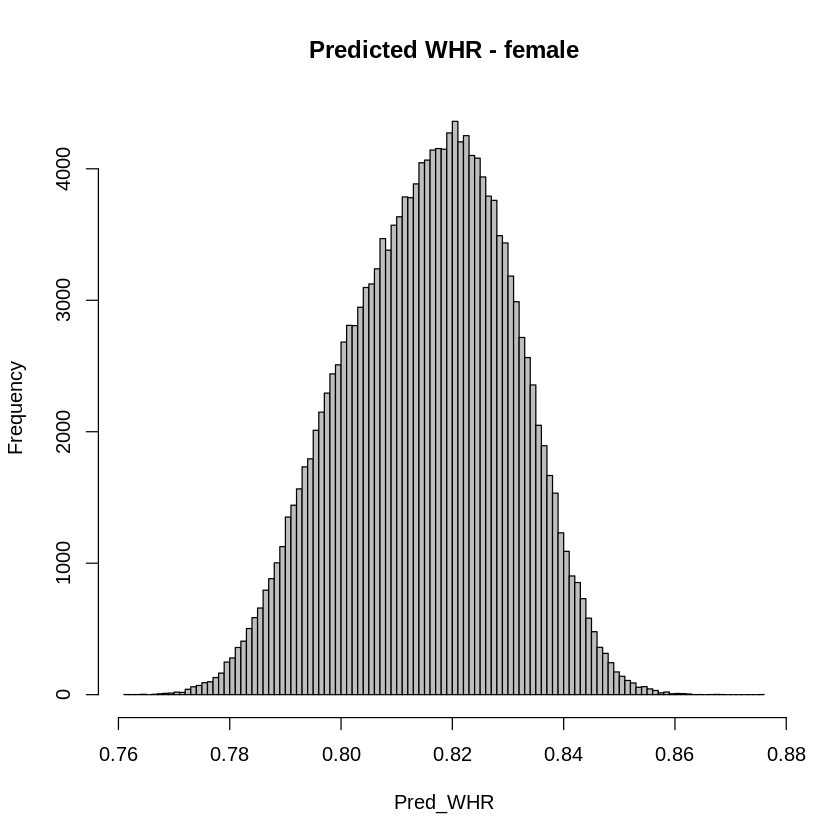

In [31]:
hist(Pred_WHR, breaks=100, col = "grey", main = "Predicted WHR - female")

### Manual TSLS using PGS000842_SCORE

In [32]:
First_Stage <- lm (WHR ~ AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10+PGS000842_SCORE)
Pred_WHR <- predict(First_Stage)
Second_Stage <- lm(CAD~Pred_WHR+AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10)
summary(Second_Stage)


Call:
lm(formula = CAD ~ Pred_WHR + AGE + PC1 + PC2 + PC3 + PC4 + PC5 + 
    PC6 + PC7 + PC8 + PC9 + PC10)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05159 -0.02912 -0.02026 -0.00811  1.00975 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.560e-01  4.932e-02  17.355  < 2e-16 ***
Pred_WHR     1.020e-01  6.749e-02   1.511 0.130709    
AGE          1.453e-03  1.132e-04  12.834  < 2e-16 ***
PC1          1.575e-04  1.328e-04   1.187 0.235406    
PC2          4.484e-05  1.583e-04   0.283 0.776932    
PC3          2.955e-04  1.871e-04   1.579 0.114281    
PC4          2.830e-04  8.432e-05   3.356 0.000791 ***
PC5          1.770e-04  5.355e-05   3.305 0.000952 ***
PC6          2.153e-05  1.710e-04   0.126 0.899783    
PC7         -7.682e-05  7.909e-05  -0.971 0.331385    
PC8          7.637e-05  1.124e-04   0.679 0.497049    
PC9          3.215e-04  7.445e-05   4.318 1.58e-05 ***
PC10         2.380e-05  1.466e-04   0.162 0.871039    
---

In [33]:
##################################################
#######    5. Weak instruments bias       ########
##################################################


# Assessing instrument strength with the F-stat (looking for >10).
# For Single SNP MR, the F-statistic is calculated as:

# Fstat = R2 * (N-2)/(1-R2)

# where R2 is the variance explained in exposure by the SNP, and N is number of individuals in the study. 
# This statistic is available in the output for OLS and TSLS


#------------------------------------------------------------------------------------------------------------------
#-------------      Q10. Looking at the F-statistic, determine if weak instruments may be an issue      -----------
#------------------------------------------------------------------------------------------------------------------


#Look at F-stat from the first-stage linear regression
 summary(lm(WHR~+rs2071931_T+rs984222_C+rs6427245_C+rs9286854_A+rs6541227_C+rs934778_G+rs13432332_C
              +rs2861643_T+rs840584_A+rs4684859_A+rs9833879_G+rs62271364_A+rs900400_C+rs17145265_C
              +rs2854050_A+rs114344942_T+rs2503097_G+rs9385414_G+rs6983481_T
              +Affx.32556093_T+rs444318_A+rs10991417_C+rs72927213_C+rs2303436_T+rs797475_A+rs6573198_G
              +rs1129003_C+rs4789257_C+rs3810068_C+rs10403360_A+rs805770_T+rs1572053_A+rs2000339_A))

# #Look at F-stat from ?diagnostics? by AER package
# summary(ivreg(CAD~WHR | rs10403360_A + rs1051921_A + 
#     rs10733793_G + rs1075403_T + rs10821962_G + rs10980802_G + 
#     rs10991417_C + rs11708337_G + rs12700667_G + rs12721046_A + 
#     rs1294421_T + rs13092573_T + rs13432332_C + rs1364063_C + 
#     rs1572053_A + rs1579557_T + rs1605750_G + rs1727302_G + rs1757471_C + 
#     rs1801265_G + rs1806755_A + rs2073267_G + rs2254069_A + rs2509957_C + 
#     rs2605110_C + rs2857702_C + rs34929649_C + rs35318931_A + 
#     rs3747579_C + rs3810068_C + rs3836828_T + rs4684859_A + rs4849294_C + 
#     rs555754_A + rs56083715_T + rs6093462_T + rs6815138_C + rs707930_C + 
#     rs75114809_A + rs805770_T + rs900400_C + rs9267995_G + rs9286854_A + 
#     rs934778_G + rs974801_G + rs984222_C), diagnostics=T)

##########
#*CHECK*
#Are all the variables and parameters now complete in your graphical representation?



Call:
lm(formula = WHR ~ +rs2071931_T + rs984222_C + rs6427245_C + 
    rs9286854_A + rs6541227_C + rs934778_G + rs13432332_C + rs2861643_T + 
    rs840584_A + rs4684859_A + rs9833879_G + rs62271364_A + rs900400_C + 
    rs17145265_C + rs2854050_A + rs114344942_T + rs2503097_G + 
    rs9385414_G + rs6983481_T + Affx.32556093_T + rs444318_A + 
    rs10991417_C + rs72927213_C + rs2303436_T + rs797475_A + 
    rs6573198_G + rs1129003_C + rs4789257_C + rs3810068_C + rs10403360_A + 
    rs805770_T + rs1572053_A + rs2000339_A)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37303 -0.04986 -0.00481  0.04506  0.74715 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.8184776  0.0009821 833.437  < 2e-16 ***
rs2071931_T      0.0018093  0.0002895   6.251 4.09e-10 ***
rs984222_C      -0.0018004  0.0002469  -7.291 3.08e-13 ***
rs6427245_C     -0.0025268  0.0002459 -10.274  < 2e-16 ***
rs9286854_A      0.0023713  0.0002428   9.765  < 2e-16 ***

rs2071931_T + rs984222_C + rs6427245_C + 
    rs9286854_A + rs6541227_C + rs934778_G + rs13432332_C + rs2861643_T + 
    rs840584_A + rs4684859_A + rs9833879_G + rs62271364_A + rs900400_C + 
    rs17145265_C + rs2854050_A + rs114344942_T + 
    rs2503097_G + rs9385414_G + rs6983481_T + Affx.32556093_T + 
    rs444318_A + rs10991417_C + rs72927213_C + rs2303436_T + 
    rs797475_A + rs6573198_G + rs1129003_C + rs4789257_C + rs3810068_C + 
    rs10403360_A + rs805770_T + rs1572053_A + rs2000339_A

In [34]:
summary(lm(WHR~rs2000339_A))


Call:
lm(formula = WHR ~ rs2000339_A)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36804 -0.05030 -0.00489  0.04551  0.74494 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  0.8173275  0.0002977 2745.377  < 2e-16 ***
rs2000339_A -0.0017229  0.0002420   -7.118  1.1e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0697 on 165831 degrees of freedom
Multiple R-squared:  0.0003054,	Adjusted R-squared:  0.0002994 
F-statistic: 50.66 on 1 and 165831 DF,  p-value: 1.101e-12


In [35]:
library(TwoSampleMR)
library(ggplot2)

TwoSampleMR version 0.5.6 
[>] New: Option to use non-European LD reference panels for clumping etc
[>] Some studies temporarily quarantined to verify effect allele
[>] See news(package='TwoSampleMR') and https://gwas.mrcieu.ac.uk for further details




In [36]:
colnames(example)

[1] "FID"             "IID_PHENO"       "SEX_PHENO"       "AGE"            
 [5] "WAIST"           "HIP"             "PC1"             "PC2"            
 [9] "PC3"             "PC4"             "PC5"             "PC6"            
[13] "PC7"             "PC8"             "PC9"             "PC10"           
[17] "CAD"             "WHR"             "AFR"             "LFR"            
[21] "TFR"             "EID"             "EVER_SMOKED"     "BMI"            
[25] "TOWNSEND"        "IID_GENO"        "PAT"             "MAT"            
[29] "SEX_GENO"        "PHENOTYPE"       "rs2071931_T"     "rs984222_C"     
[33] "rs6427245_C"     "rs9286854_A"     "rs6541227_C"     "rs934778_G"     
[37] "rs13432332_C"    "rs2861643_T"     "rs840584_A"      "rs4684859_A"    
[41] "rs9833879_G"     "rs62271364_A"    "rs900400_C"      "rs17145265_C"   
[45] "rs2854050_A"     "rs114344942_T"   "rs2503097_G"     "rs9385414_G"    
[49] "rs6983481_T"     "Affx.32556093_T" "rs444318_A"      "rs10991417_C"   
[53] "rs72927213_C"    "rs2303436_T"     "rs797475_A"      "rs6573198_G"    
[57] "rs1129003_C"     "rs4789257_C"     "rs3810068_C"     "rs10403360_A"   
[61] "rs805770_T"      "rs1572053_A"     "rs2000339_A"     "PGS000842_SCORE"
[65] "DBP"             "SBP"

In [37]:
n_cols <- ncol(example)
columns = c("SNP", 
            "effect_allele.exposure","beta.exposure","se.exposure", "t.exposure", "p.exposure",
            "effect_allele.outcome","beta.outcome","se.outcome", "t.outcome", "p.outcome",
            "id.exposure", "exposure", "id.outcome", "outcome", "mr_keep") 
my_df = data.frame(matrix(nrow = 0, ncol = length(columns))) 
colnames(my_df) = columns
for (col_index in seq(31, 64)) # all snp columns for female
{
    cad_summary <- summary(lm(example[, "CAD"]~example[, col_index]))
    #print(class(cad_summary))
    cad_coefficients <- cad_summary$coefficients
    if (dim(cad_coefficients)[1] > 1){
        cad_coefficients <- cad_coefficients[2, ]
        } else {
        cad_coefficients <- c('', '', '', '')
    }
    whr_summary <- summary(lm(example[, "WHR"]~example[, col_index]))
    #print(class(cad_summary))
    whr_coefficients <- whr_summary$coefficients
    mr_keep <- NULL
    if (dim(whr_coefficients)[1] > 1){
        whr_coefficients <- whr_coefficients[2, ]
        mr_keep <- TRUE
        } else {
        mr_keep <- FALSE
        whr_coefficients <- c('', '', '', '')
    }
    #cad_sigma <- cad_summary$sigma
    #cad_rsquared <- cad_summary$r.squared
    #print(class(cad_coefficients))
    #print(cad_coefficients)
    snp_effect_allele <- strsplit(colnames(example)[col_index], "_")
    snp <- snp_effect_allele[[1]][1]
    effect_allele <- snp_effect_allele[[1]][2]
    #print(snp)
    #print(effect_allele)
    my_df <- rbind(my_df, c(c(snp, effect_allele),
                          as.vector(whr_coefficients), 
                          c(effect_allele),
                          as.vector(cad_coefficients), 
                          c("UKB_WHR", "WHR", "UKB_CAD", "CAD", mr_keep)))
}
colnames(my_df) = columns
write.csv(my_df, 
          file = paste("output/data_", sex, "_WHR_Exposure_CAD_Outcome_OneSample.csv"), 
          quote = FALSE,
          #sep = "",
          row.names=TRUE)

In [38]:
dat<-read.csv("output/data_ female _WHR_Exposure_CAD_Outcome_OneSample.csv")

In [39]:
#Make sure effect alleles match. Otherwise change sign of beta:
dat$effect_allele.outcome<-as.factor(dat$effect_allele.outcome)
dat$effect_allele.exposure<-as.factor(dat$effect_allele.exposure)
lev2 <- unique( c( levels(dat$effect_allele.outcome), levels(dat$effect_allele.exposure) ) )
dat$effect_allele.outcome <- factor(dat$effect_allele.outcome, levels=lev2)
dat$effect_allele.exposure <- factor(dat$effect_allele.exposure, levels=lev2)
dat$effect_allele.exposure<-gsub(" ", "",dat$effect_allele.exposure, fixed = TRUE)
dat$beta.exposure[dat$effect_allele.exposure!=dat$effect_allele.outcome]<-dat$beta.exposure[dat$effect_allele.exposure!=dat$effect_allele.outcome] * -1

#To see MR methods that can be used:
mr_method_list()
#Default methods: IVW, MR-Egger, Weighted Median, Simple Mode, Weighted Mode

#To view default parameters (parameters used unless otherwise specified):
default_parameters()

obj,name,PubmedID,Description,use_by_default,heterogeneity_test
<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>
mr_wald_ratio,Wald ratio,,,TRUE,FALSE
mr_two_sample_ml,Maximum likelihood,,,FALSE,TRUE
mr_egger_regression,MR Egger,26050253,,TRUE,TRUE
mr_egger_regression_bootstrap,MR Egger (bootstrap),26050253,,FALSE,FALSE
mr_simple_median,Simple median,,,FALSE,FALSE
mr_weighted_median,Weighted median,,,TRUE,FALSE
mr_penalised_weighted_median,Penalised weighted median,,,FALSE,FALSE
mr_ivw,Inverse variance weighted,,,TRUE,TRUE
mr_ivw_radial,IVW radial,,,FALSE,TRUE


$test_dist
[1] "z"

$nboot
[1] 1000

$Cov
[1] 0

$penk
[1] 20

$phi
[1] 1

$alpha
[1] 0.05

$Qthresh
[1] 0.05

$over.dispersion
[1] TRUE

$loss.function
[1] "huber"

$shrinkage
[1] FALSE

In [40]:
res<-mr(dat, method_list=c("mr_egger_regression", "mr_ivw", "mr_weighted_median"))
res

Analysing 'UKB_WHR' on 'UKB_CAD'



id.exposure,id.outcome,outcome,exposure,method,nsnp,b,se,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
UKB_WHR,UKB_CAD,CAD,WHR,MR Egger,34,0.1131679,0.06157061,7.535905e-02
UKB_WHR,UKB_CAD,CAD,WHR,Inverse variance weighted,34,0.1505252,0.03626536,3.315181e-05
UKB_WHR,UKB_CAD,CAD,WHR,Weighted median,34,0.1314392,0.05884996,2.551842e-02


In [41]:
p1 <- mr_scatter_plot(res, dat)
ggsave(p1[[1]], file = "plots/female_scatter.pdf.pdf", width = 7, height = 7)


res_single <- mr_singlesnp(dat)
p2 <- mr_forest_plot(res_single)
ggsave(p2[[1]], file = "plots/female_forest.pdf", width = 7, height = 7)

res_single <- mr_singlesnp(dat, all_method = c("mr_ivw"))
p3 <- mr_forest_plot(res_single)
ggsave(p3[[1]], file = "plots/female_forest_methods.pdf", width = 7, height = 7)

res_loo <- mr_leaveoneout(dat)
p3 <- mr_leaveoneout_plot(res_loo)
ggsave(p3[[1]], file = "plots/female_leaveoneout.pdf", width = 7, height = 7)


res_single <- mr_singlesnp(dat)
p4 <- mr_funnel_plot(res_single)
ggsave(p4[[1]], file = "plots/female_funnel.pdf", width = 7, height = 7)


Warning message:
“Removed 1 rows containing missing values (`geom_errorbarh()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_errorbarh()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_errorbarh()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


In [42]:
mr_pleiotropy_test(dat)

id.exposure,id.outcome,outcome,exposure,egger_intercept,se,pval
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
UKB_WHR,UKB_CAD,CAD,WHR,0.000120324,0.0001602625,0.458263
